___
# <center>Albums Clustering</center>
___ 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## DataFrame

In [2]:
albums=pd.read_csv('albums.csv')
songs=pd.read_csv('songs.csv')
users=pd.read_csv('users.csv')
usersongrelationships=pd.read_csv('usersongrelationships.csv')

df1=pd.merge(songs, albums, on="album_id") 
df2=pd.merge(df1,usersongrelationships, on="song_id") 
df=pd.merge(df2, users, on="user_id")
df

,song_id,album_id,song_title,artist,genre,album_title,pub_year,user_id,is_favorite,is_added_to_playlist,listen_count,username,email,gender,city,date_of_birth
0,8,6,Moh Moh Ke Dhaage,Papon,Bollywood,Dum Laga Ke Haisha,2018,1,False,False,0,vishal,vishalkmr@gmail.com,Male,Gurgaon,1996-10-14
1,9,7,Mast Magan,Arijit Singh,Bollywood,Two States,2014,1,False,False,0,vishal,vishalkmr@gmail.com,Male,Gurgaon,1996-10-14
2,10,7,Chaandaniya,K Mohan,Bollywood,Two States,2014,1,False,False,0,vishal,vishalkmr@gmail.com,Male,Gurgaon,1996-10-14
3,11,8,Baarish,Tanishk Bagchi,Bollywood,Half Girlfriend,2017,1,False,False,0,vishal,vishalkmr@gmail.com,Male,Gurgaon,1996-10-14
4,12,8,Phir Bhi Tumko Chahunga,Arijit Singh,Bollywood,Half Girlfriend,2017,1,False,False,0,vishal,vishalkmr@gmail.com,Male,Gurgaon,1996-10-14
5,13,8,Phir Bhi Tumko Chaahungi,Shraddha Kapoor,Bollywood,Half Girlfriend,2017,1,False,False,0,vishal,vishalkmr@gmail.com,Male,Gurgaon,1996-10-14
6,14,9,Kaash,Bilal Saeed,Punjabi,Kaash,2015,1,False,False,0,vishal,vishalkmr@gmail.com,Male,Gurgaon,1996-10-14
7,15,10,Not Afraid,Eminem,Hip-Hop,Recovery,2010,1,False,False,0,vishal,vishalkmr@gmail.com,Male,Gurgaon,1996-10-14
8,16,10,Space Bound,Eminem,Hip-Hop,Recovery,2010,1,False,False,0,vishal,vishalkmr@gmail.com,Male,Gurgaon,1996-10-14
9,29,10,To Life,Eminem,Hip-Hop,Recovery,2010,1,True,True,1,vishal,vishalkmr@gmail.com,Male,Gurgaon,1996-10-14


## Data Preproccessing

In [3]:
def album_year(album_title):
	x=str(df[df['album_title']==album_title]['pub_year'].unique())
	x=x.split('-')[0]
	return int(x[1:-1])

In [4]:
u=df[['username','gender','album_title','date_of_birth','song_title','artist','listen_count','is_favorite','is_added_to_playlist']]
u=u.groupby('album_title').sum()
x=pd.DataFrame(u.index)
x.reset_index()
y=x['album_title'].apply(album_year)
u['pub_year']=[y[i] for i in range(0,len(y))]
u

,listen_count,is_favorite,is_added_to_playlist,pub_year
album_title,,,,
Adele,6,4.0,4.0,2016
Ae Dil Hai Mushkil,4,1.0,1.0,2016
Bollywood Unwind,1,0.0,0.0,2015
Crook,4,1.0,2.0,2010
Dum Laga Ke Haisha,1,0.0,0.0,2018
Ek Villain,4,3.0,3.0,2014
Half Girlfriend,6,3.0,4.0,2017
Hamari Adhuri Kahani,3,1.0,1.0,2015
Kaash,1,1.0,1.0,2015


In [5]:
X = u.iloc[:, :].values
# Feature Scaling
sc_X = StandardScaler()
SX = sc_X.fit_transform(X)

## Applying K-Means Clustering

In [6]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_sc_kmeans = kmeans.fit_predict(SX)

## Data Analysis

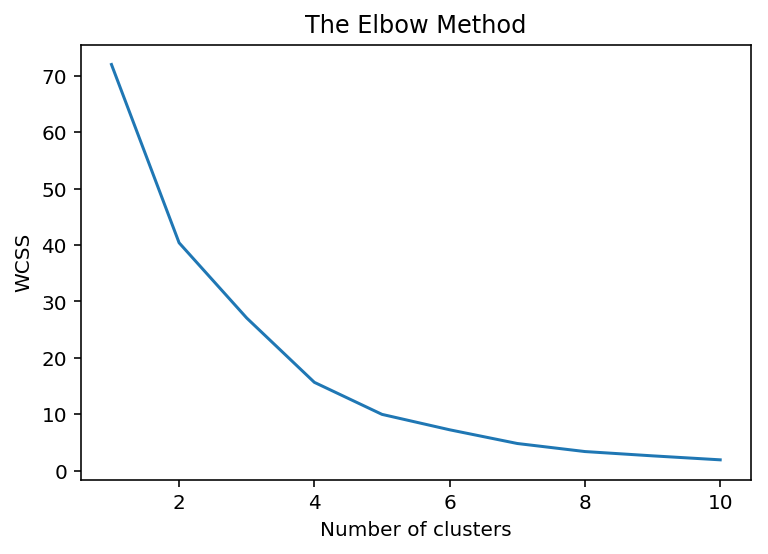

In [7]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(SX)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
su=pd.DataFrame(u.index)
RX=sc_X.inverse_transform(SX)
su['listen_count']=RX[:,0:1]
su['is_favorite']=RX[:,1:2]
su['is_added_to_playlist']=RX[:,2:3]
su['pub_year']=RX[:,-1]
su['cluster']=y_sc_kmeans
su.set_index('album_title',inplace=True)
su

,listen_count,is_favorite,is_added_to_playlist,pub_year,cluster
album_title,,,,,
Adele,6.0,4.0,4.0,2016.0,2
Ae Dil Hai Mushkil,4.0,1.0,1.0,2016.0,3
Bollywood Unwind,1.0,0.0,0.0,2015.0,3
Crook,4.0,1.0,2.0,2010.0,0
Dum Laga Ke Haisha,1.0,0.0,0.0,2018.0,3
Ek Villain,4.0,3.0,3.0,2014.0,0
Half Girlfriend,6.0,3.0,4.0,2017.0,2
Hamari Adhuri Kahani,3.0,1.0,1.0,2015.0,3
Kaash,1.0,1.0,1.0,2015.0,3


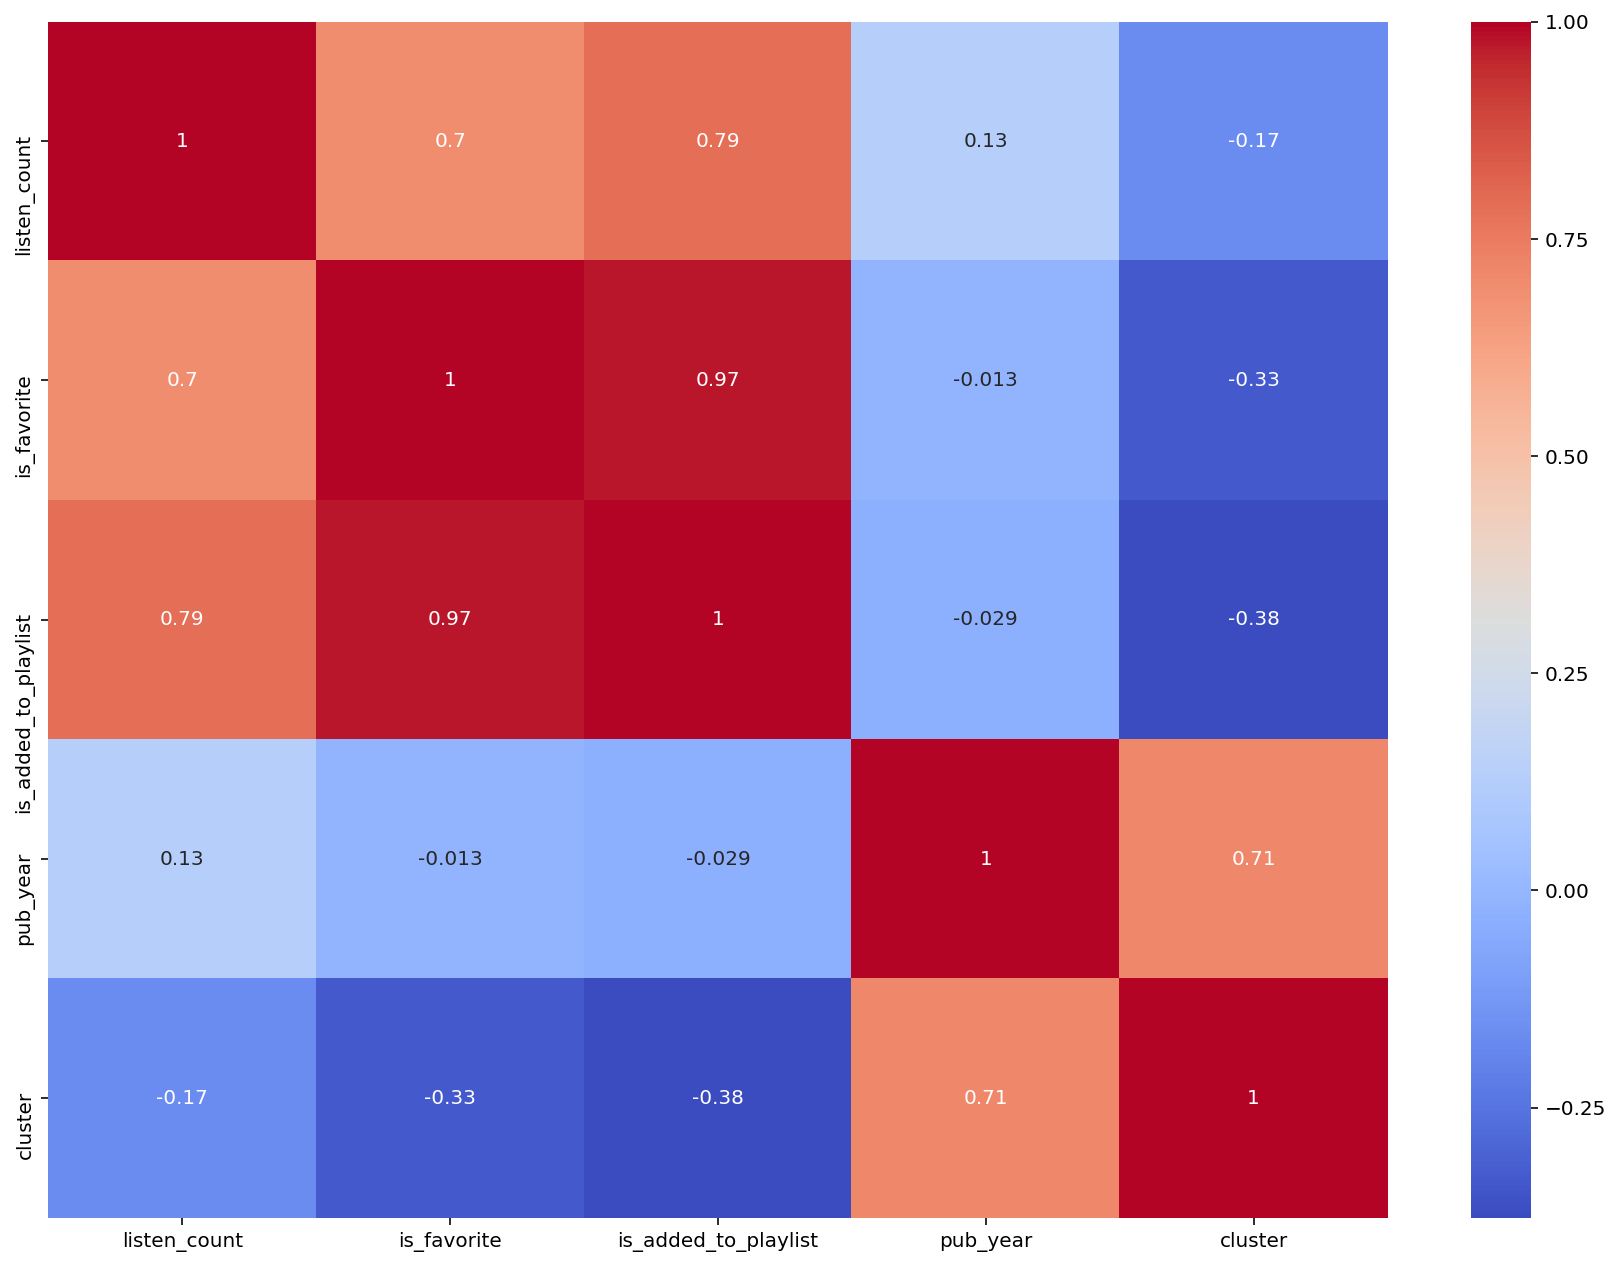

In [9]:
plt.figure(figsize=(15,11))
sns.heatmap(su.corr(),cmap='coolwarm',annot=True) 

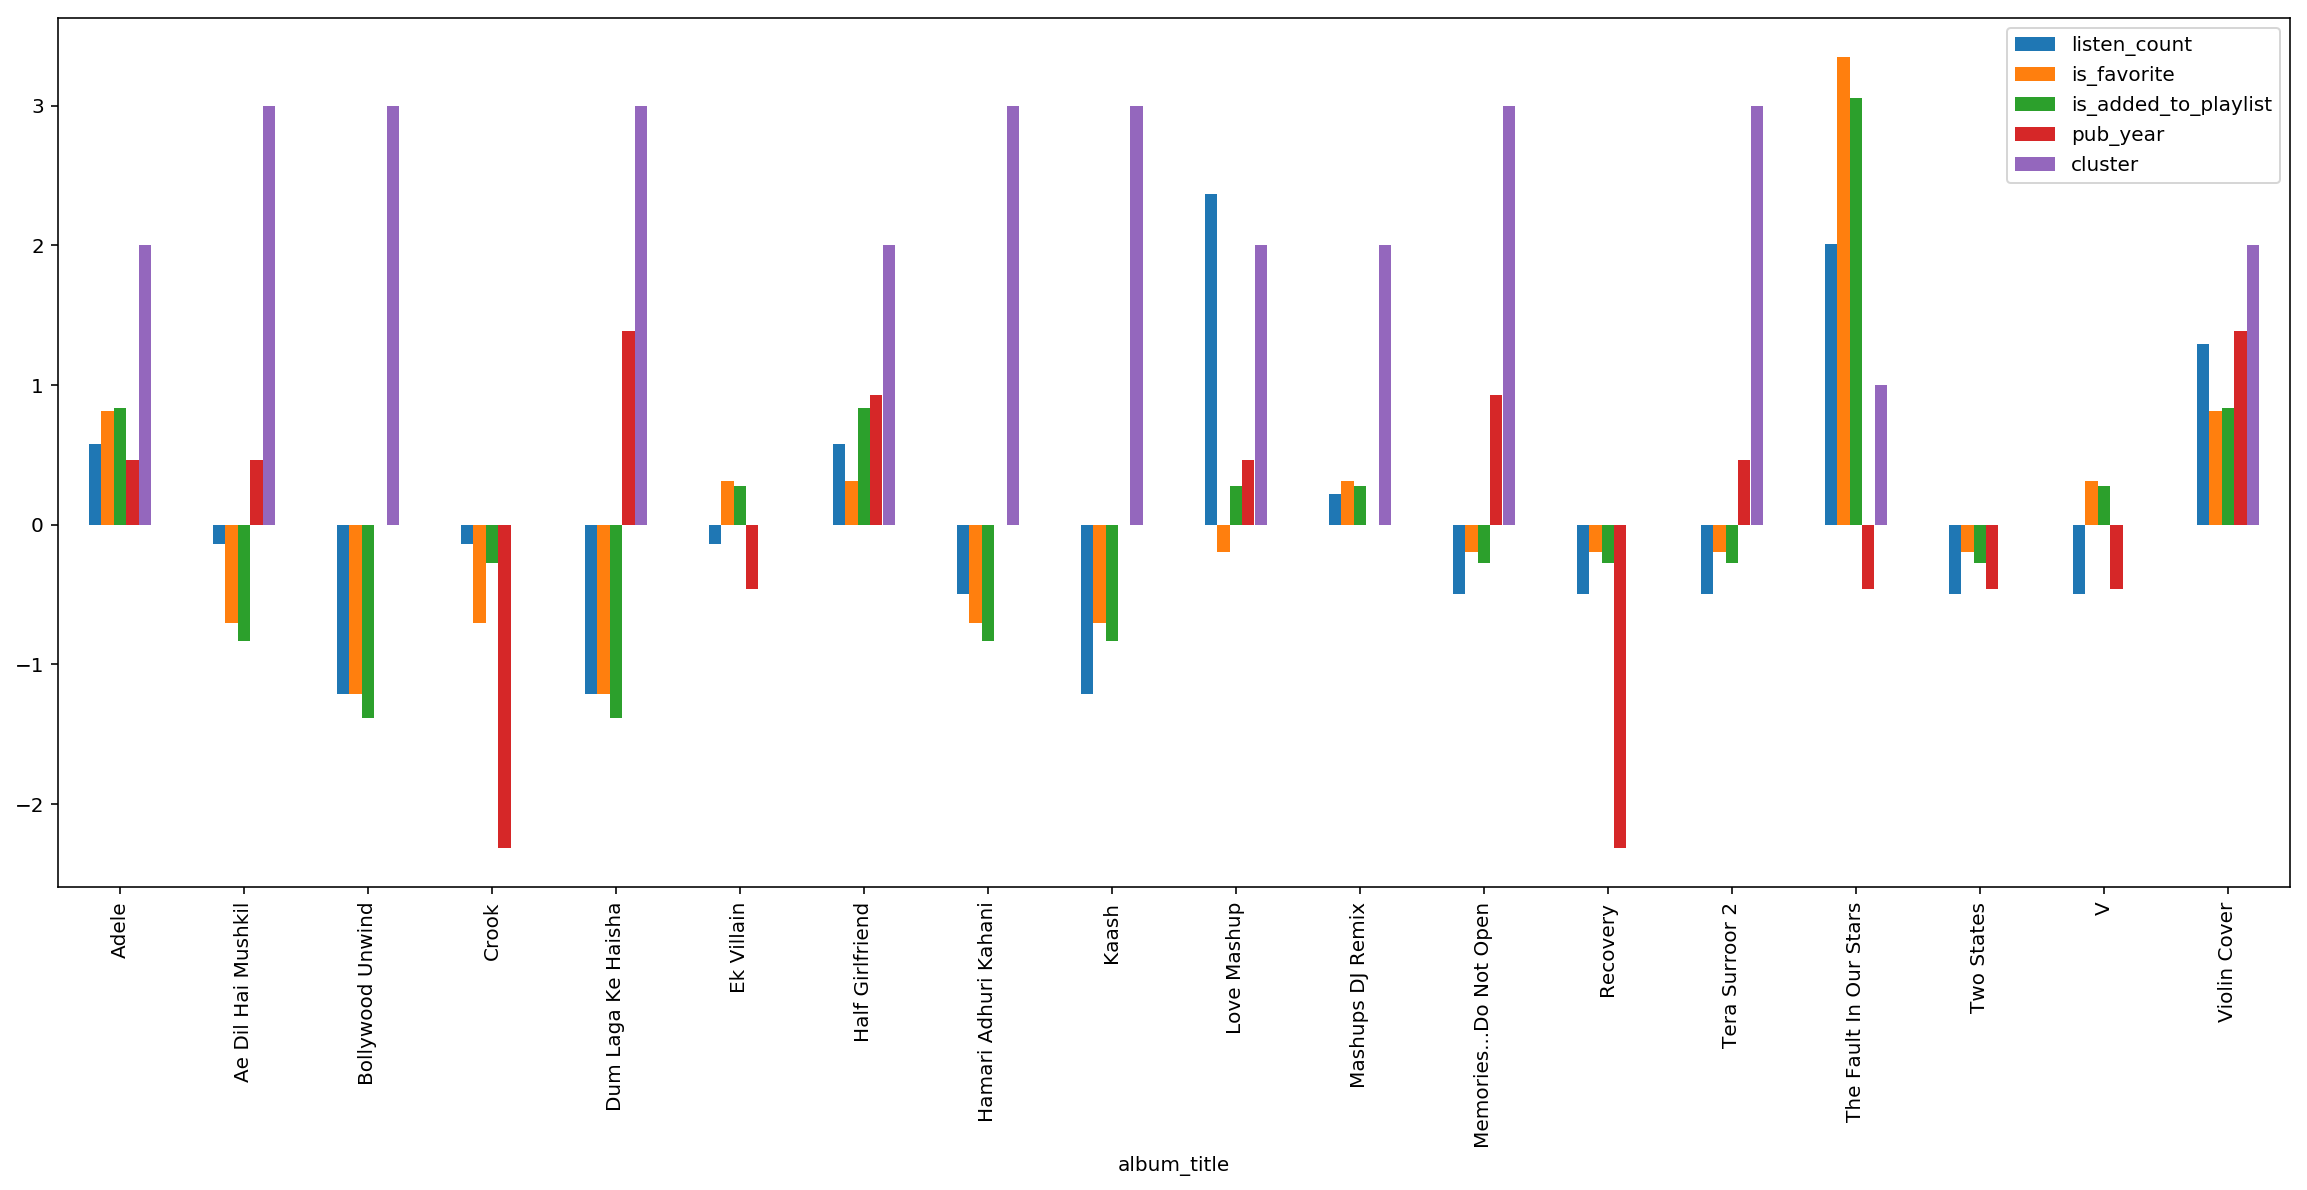

In [10]:
su['listen_count']=SX[:,0:1]
su['is_favorite']=SX[:,1:2]
su['is_added_to_playlist']=SX[:,2:3]
su['pub_year']=SX[:,-1]
su.plot.bar(figsize=(20,8))

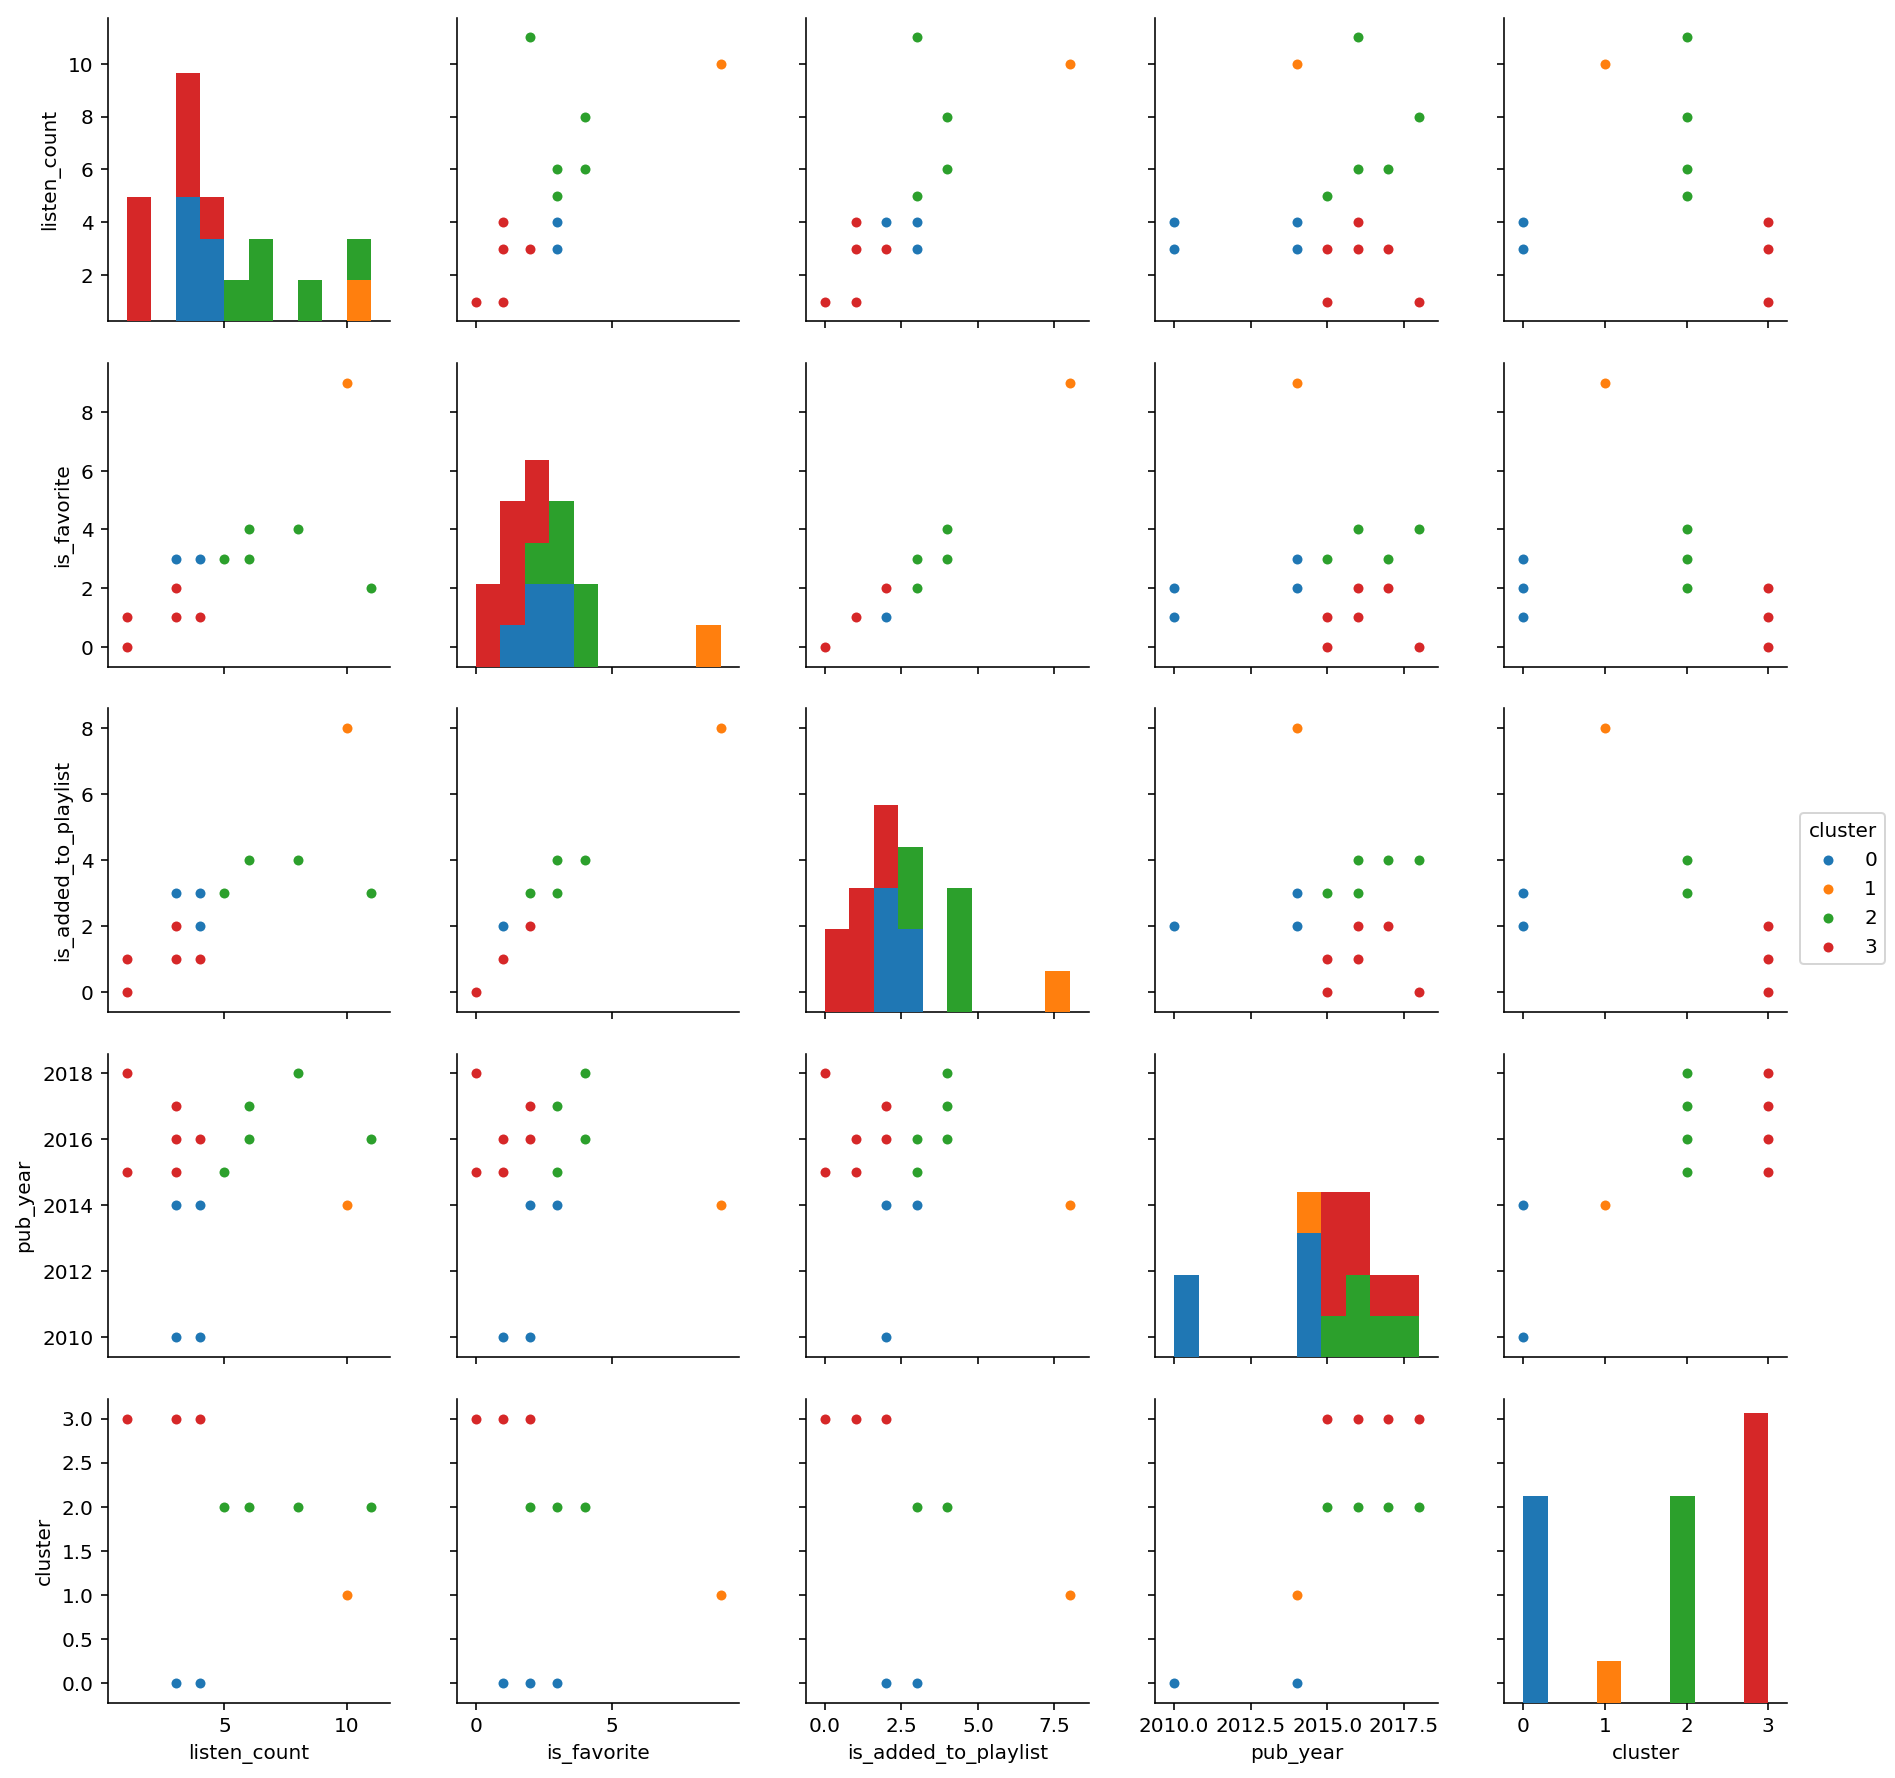

In [11]:
RX=sc_X.inverse_transform(SX)
su['listen_count']=RX[:,0:1]
su['is_favorite']=RX[:,1:2]
su['is_added_to_playlist']=RX[:,2:3]
su['pub_year']=RX[:,-1]
sns.pairplot(su,hue='cluster')

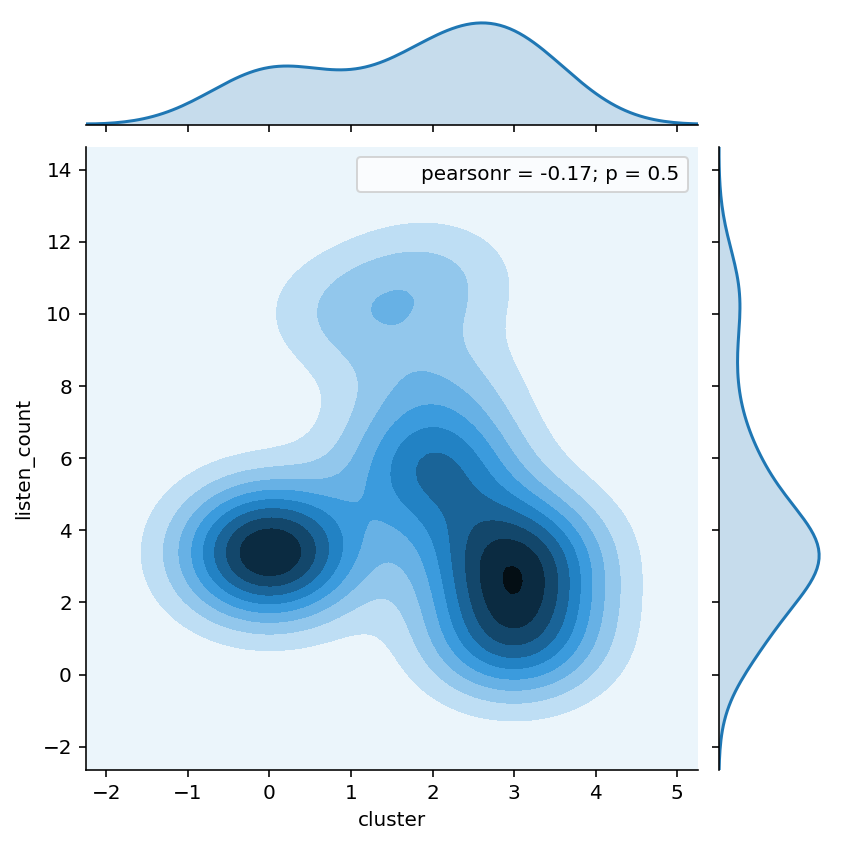

In [12]:
sns.jointplot(x='cluster',y='listen_count',kind='kde',data=su)

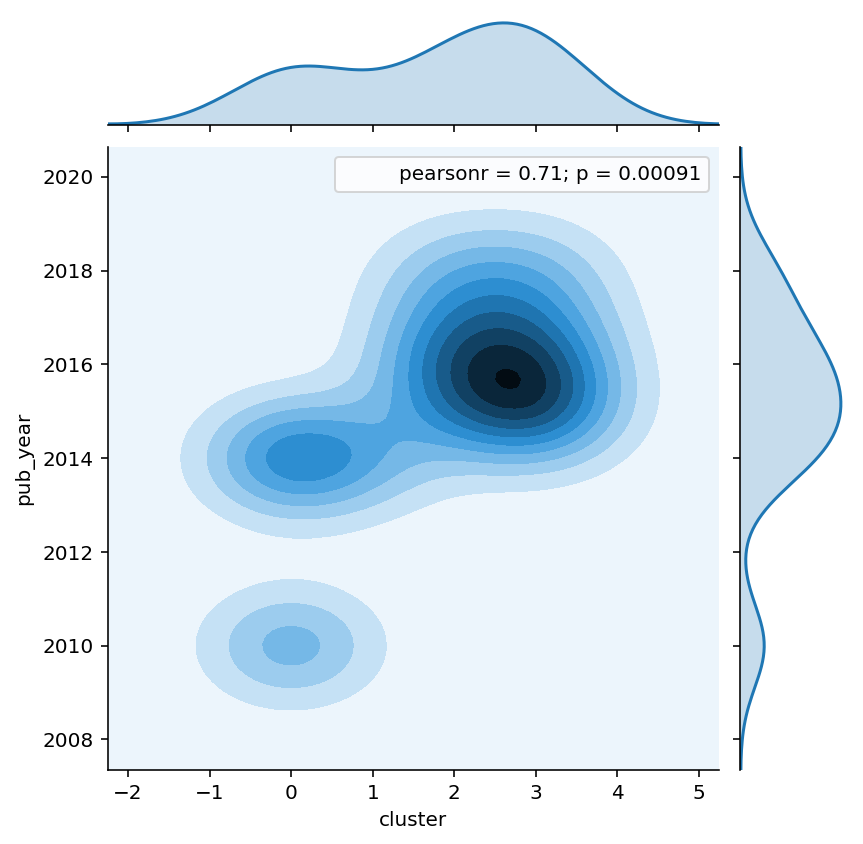

In [13]:
sns.jointplot(x='cluster',y='pub_year',kind='kde',data=su)

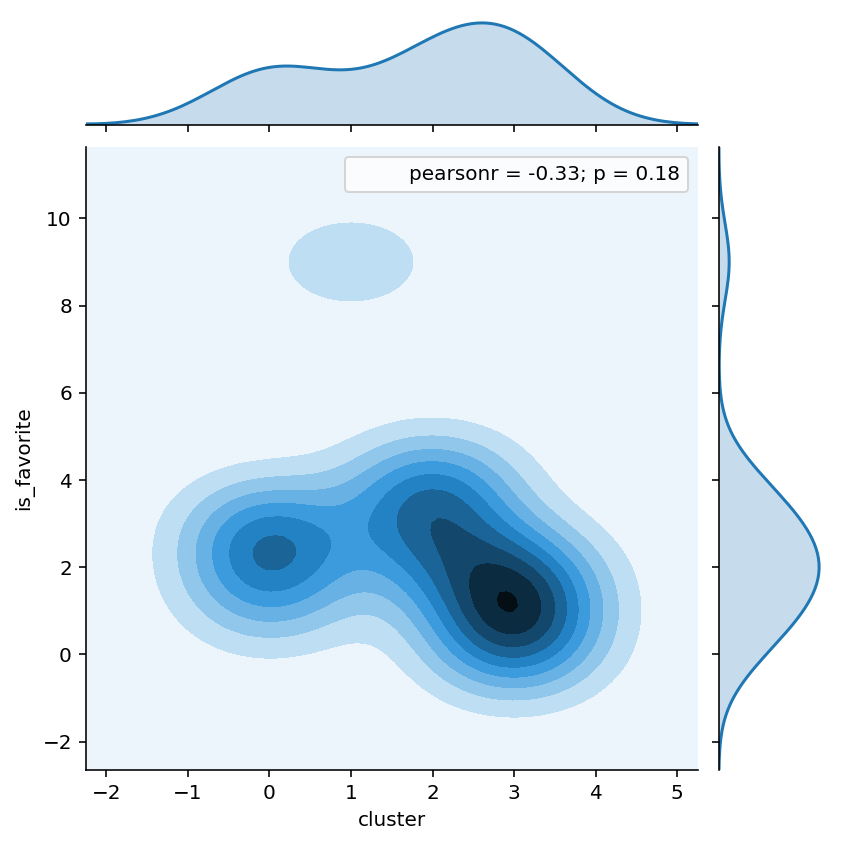

In [14]:
sns.jointplot(x='cluster',y='is_favorite',kind='kde',data=su)

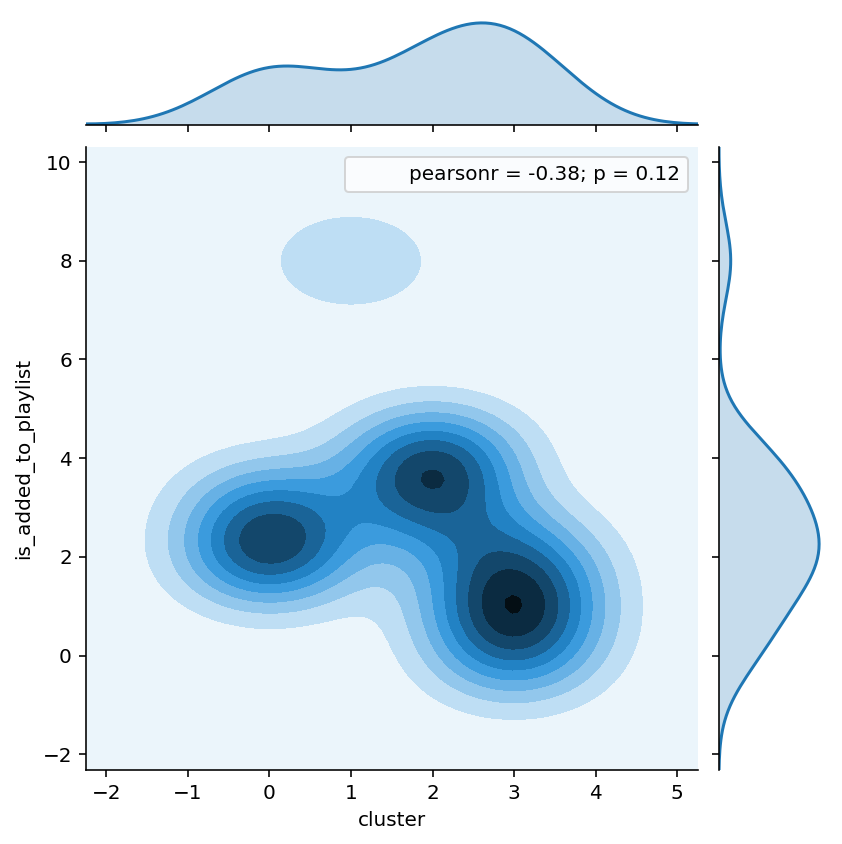

In [15]:
sns.jointplot(x='cluster',y='is_added_to_playlist',kind='kde',data=su)

## Similar Albums

In [16]:
album_title='Half Girlfriend'
su[su.index==album_title]['cluster']
similar_album=su[su['cluster']==su[su.index==album_title]['cluster'][0]].index

print("*"*35+" Similar Albums Based on Clustering "+'*'*30)
print('Cluster  : '+str(su[su.index==album_title]['cluster'][0]))     
for album in similar_album:
    print(album)
print('*'*100) 

*********************************** Similar Albums Based on Clustering ******************************
Cluster  : 2
Adele
Half Girlfriend
Love Mashup
Mashups DJ Remix
Violin Cover
****************************************************************************************************
